In [72]:
import librosa
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment
from scipy import signal
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import tensorflow_io as tfio
import librosa.display
import IPython.display as ipd
import warnings
warnings.simplefilter("ignore", UserWarning)
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
os.getcwd()

In [37]:
pathAudio = '/home/stud/m/mh361/share/sample-same/'
files = librosa.util.find_files(pathAudio, ext=['mp3'])
songa = []
songb = []
songc = []
for file in files:
    if "Dee Yan-Key-Yuletide" in file:
        songa.append(file)
    if "Holizna - So Broke" in file:
        songb.append(file)
    if "Independent Music Licensing Collective" in file:
        songc.append(file)
filesa = sorted(songa, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesb = sorted(songb, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesc = sorted(songc, key=lambda x: int(x.split('_')[-1].split(".")[0]))
filesa = filesa[:-1]
filesb = filesb[:-1]
filesc = filesc[:-1]

files = filesa+filesb+filesc

In [43]:
def normalize_sample(sample):
    array_of_samples = sample.get_array_of_samples()
    np_arr = np.array(array_of_samples)
    np_arr = np_arr.reshape(1, -1)
    return preprocessing.normalize(np_arr)

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


samples = []
samples_sec_canal = []
for file_name in files:
    x, sr = librosa.load(file_name, sr=44100)
    #sample = AudioSegment.from_mp3(file_name)
    #mono_samples = sample.split_to_mono()
    #normalized_sample = normalize_sample(mono_samples[0])[0]
    normalized_sample = NormalizeData(x)
    #resampled_sample = signal.resample(normalized_sample, int(len(normalized_sample) / 35))
    resampled_sample = signal.resample(normalized_sample, 4700)
    samples.append(resampled_sample)
    #normalized_sample_sec_canal = normalize_sample(mono_samples[1])[0]
    #resampled_sample_sec_canal = signal.resample(normalized_sample_sec_canal, 4700)
    #samples_sec_canal.append(resampled_sample_sec_canal)

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


for file_name in files:
    X, sr = librosa.load(file_name, sr=44100)
    scaled_x = NormalizeData(X)
    X = librosa.stft(scaled_x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(X, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
shortest_length = min(map(len, samples))
shortest_length

In [ ]:
shortest_length = max(map(len, samples))
shortest_length

In [44]:
samples = np.array(samples)


array([[0.4990324 , 0.5048024 , 0.5031986 , ..., 0.50312257, 0.5168291 ,
        0.5008941 ],
       [0.4990324 , 0.5048024 , 0.5031986 , ..., 0.50312257, 0.5168291 ,
        0.5008941 ],
       [0.49335247, 0.5161771 , 0.5156601 , ..., 0.55632675, 0.531679  ,
        0.4788222 ],
       ...,
       [0.5129198 , 0.50752133, 0.42163783, ..., 0.20781656, 0.22677305,
        0.38044932],
       [0.5260657 , 0.41461697, 0.45506594, ..., 0.4862514 , 0.53830945,
        0.49116847],
       [0.4591612 , 0.5504913 , 0.44395155, ..., 0.50510645, 0.51132333,
        0.46252388]], dtype=float32)

In [45]:
X_train = []
Y_train = []
for i in range(len(samples)):
    Y_train.append(1)
    if i < len(samples)-1:
        x = list(samples[i])
        y = list(samples[i+1])
        z = x + y
        X_train.append(z)
    else:
        x = list(samples[i])
        y = list(samples[0])
        z = x + y
        X_train.append(z)

In [ ]:
X_train

In [46]:
import random

X_false = []
Y_false = []
shuffled = samples
random.shuffle(shuffled)
for i in range(len(shuffled)):
    Y_false.append(0)
    if i < len(shuffled)-1:
        x = list(shuffled[i])
        y = list(shuffled[i+1])
        z = x + y
        X_false.append(z)   
    else:
        x = list(shuffled[i])
        y = list(shuffled[0])
        z = x + y
        X_false.append(z)



In [47]:
X_train_total = []
Y_train_total = []
'''for i in range(len(X)):
    X_train.append(X[i])
    X_train.append(X_false[i])
    Y_train.append(True)
    Y_train.append(False)'''
X_train_total.append(X_train)
X_train_total.append(X_false)
Y_train_total.append(Y_train)
Y_train_total.append(Y_false)

In [48]:
X_train_total = np.array(X_train_total)
X_train_total.shape

(2, 145, 9400)

In [49]:
Y_train_total = np.array(Y_train_total)
Y_train_total.shape

(2, 145)

In [50]:
X_train_total = X_train_total.reshape(-1, 9400)
X_train_total.shape

(290, 9400)

In [51]:
Y_train_total = np.array(Y_train_total).reshape(-1, 1)
Y_train_total.shape

(290, 1)

In [66]:
from keras.layers import LSTM, Dense, Conv1D, MaxPool1D
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=50, kernel_size=2, input_shape=(9400, 1))) #filter=100, kernel_size=4
model.add(MaxPool1D(pool_size=2, strides=2)) # pool_size=4, strides=4
model.add(LSTM(20, activation='sigmoid'))  #499 #sigmoid
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])  #sgd
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 9399, 50)          150       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4699, 50)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 20)                5680      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [73]:
early_stopping = EarlyStopping()
model.fit(X_train_total, Y_train_total, epochs=10, callbacks=early_stopping)

# 17 min

Epoch 1/10
10/10 [==============================] - 69s 5s/step - loss: 0.9397 - accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 36s 4s/step - loss: 0.8263 - accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 33s 3s/step - loss: 0.7646 - accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 35s 4s/step - loss: 0.7259 - accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 32s 3s/step - loss: 0.6982 - accuracy: 0.5172
Epoch 6/10
10/10 [==============================] - 33s 3s/step - loss: 0.6985 - accuracy: 0.5103
Epoch 7/10
10/10 [==============================] - 32s 3s/step - loss: 0.7004 - accuracy: 0.5138
Epoch 8/10
10/10 [==============================] - 33s 3s/step - loss: 0.6958 - accuracy: 0.4586
Epoch 9/10
10/10 [==============================] - 34s 3s/step - loss: 0.6985 - accuracy: 0.5069
Epoch 10/10
10/10 [==============================] - 33s 3s/step - loss: 0.6964 - accuracy: 0.5069


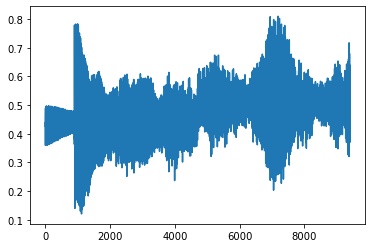

1/1 [==============================] - 0s 165ms/step


array([[0.48895615]], dtype=float32)

In [83]:
example_x_train = X_train_total[5]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 9400 , 1)
model.predict(example_x_train)

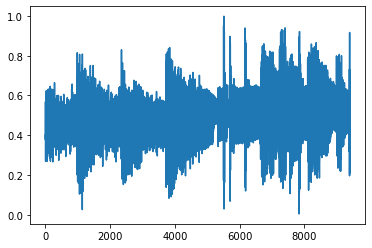

1/1 [==============================] - 0s 157ms/step


array([[0.43597475]], dtype=float32)

In [79]:
example_x_train = X_train_total[-4]
plt.plot(example_x_train)
plt.show()
example_x_train = example_x_train.reshape(1, 9400 , 1)
model.predict(example_x_train)

In [ ]:
samples_sec_ch = np.array(samples_sec_canal)
full_song_sec_ch = []
for sample in samples_sec_ch:
    full_song_sec_ch.extend(sample)
second_channel_data = full_song_sec_ch[4000:6000]
plt.plot(second_channel_data)
plt.show()
second_channel_data = np.array(second_channel_data)
second_channel_data = second_channel_data.reshape(1, 2000)
model.predict(second_channel_data)

In [ ]:
extracted_sample = full_song_sec_ch[4000:6000]
new_start = extracted_sample[999:1999]
new_end = extracted_sample[0:1000]
switched_sample = new_start + new_end
plt.plot(switched_sample)
plt.show()
switched_sample = np.array(switched_sample)
switched_sample = switched_sample.reshape(1, 2000)
model.predict(switched_sample)

In [ ]:
reversed_sample = reversed_data[4000:6000]
plt.plot(reversed_sample)
plt.show()
reversed_sample = np.array(reversed_sample)
reversed_sample = reversed_sample.reshape(1, 2000)
model.predict(reversed_data)

In [ ]:
#filename = 'model_weights.h5'
#model.save(filename)